In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import datetime

In [2]:
# get data from https://github.com/CSSEGISandData/COVID-19, provided by Johns Hopkins University

confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

## Global Trends

In [3]:
latest_date = datetime.datetime(int(confirmed.columns[-1][5:7]),
                  int(confirmed.columns[-1][0]),
                  int(confirmed.columns[-1][2:4])).strftime("%B%d")

print('Data is as of', latest_date)

Data is as of March31


In [4]:
# get daily confirmed cases
confirmed_daily = confirmed.iloc[:, 4:].sum() 
confirmed_daily = pd.DataFrame({'date':confirmed_daily.index, 'confirmed_count':confirmed_daily.values})
confirmed_daily.date = pd.to_datetime(confirmed_daily.date)

# confirmed case counts higher than 99999
confirmed_daily[confirmed_daily.confirmed_count > 99999] 

,date,confirmed_count
44,2020-03-06,101801
45,2020-03-07,105847
46,2020-03-08,109821
47,2020-03-09,113590
48,2020-03-10,118620
49,2020-03-11,125875
50,2020-03-12,128352
51,2020-03-13,145205
52,2020-03-14,156101
53,2020-03-15,167454


In [5]:
# time period for every 100000th confirmed case
print(confirmed_daily.date[44] - confirmed_daily.date[0], '    first 100000 cases')
print(confirmed_daily.date[56] - confirmed_daily.date[44], '   + 100000 cases')
print(confirmed_daily.date[59] - confirmed_daily.date[56], '    + 100000 cases')
print(confirmed_daily.date[62] - confirmed_daily.date[59], '    + 100000 cases')
print(confirmed_daily.date[64] - confirmed_daily.date[62], '    + 100000 cases')
print(confirmed_daily.date[66] - confirmed_daily.date[64], '    + 100000 cases')
print(confirmed_daily.date[67] - confirmed_daily.date[66], '    + 100000 cases')

44 days 00:00:00     first 100000 cases
12 days 00:00:00    + 100000 cases
3 days 00:00:00     + 100000 cases
3 days 00:00:00     + 100000 cases
2 days 00:00:00     + 100000 cases
2 days 00:00:00     + 100000 cases
1 days 00:00:00     + 100000 cases


C:\Users\Anar\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


(array([737446., 737490., 737502., 737505., 737508., 737510., 737512.,
        737513.]), <a list of 8 Text xticklabel objects>)

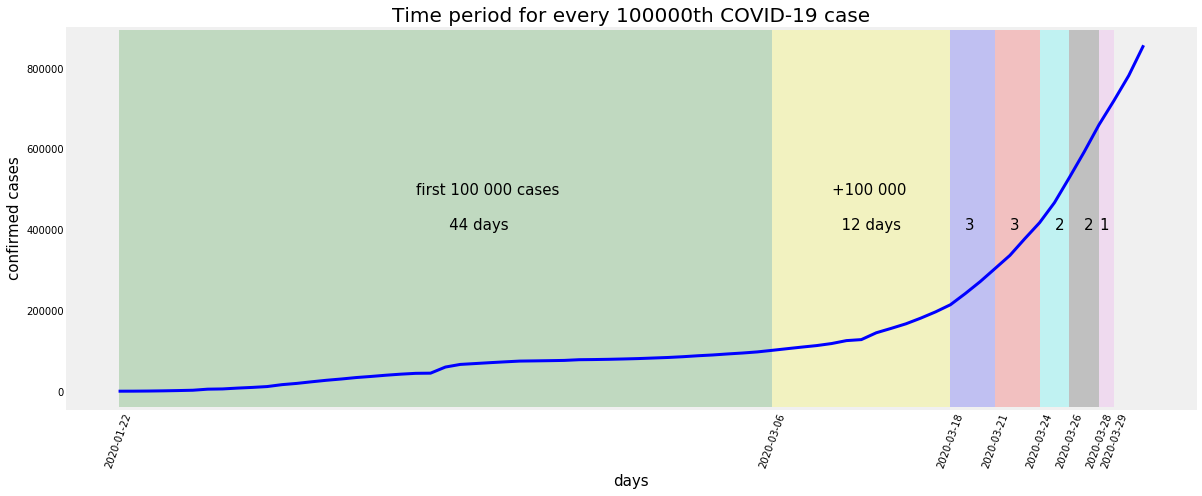

In [6]:
plt.figure(figsize=(18, 7))
plt.plot(confirmed_daily.date, confirmed_daily.confirmed_count, linewidth=3, color='b')
plt.title('Time period for every 100000th COVID-19 case', size=20)
plt.xlabel('days', size=15)
plt.ylabel('confirmed cases', size=15)
plt.xticks(size=10)
plt.yticks(size=10)
# plt.gca().set_facecolor('w')
plt.grid(False)
plt.axvspan(confirmed_daily.date[0], confirmed_daily.date[44], facecolor='green', alpha=0.2)
plt.text(confirmed_daily.date[20], 400000, 'first 100 000 cases \n\n       44 days', size=15)
plt.axvspan(confirmed_daily.date[44], confirmed_daily.date[56], facecolor='yellow', alpha=0.2)
plt.text(confirmed_daily.date[48], 400000, '+100 000 \n\n  12 days', size=15)
plt.axvspan(confirmed_daily.date[56], confirmed_daily.date[59], facecolor='blue', alpha=0.2)
plt.text(confirmed_daily.date[57], 400000, '3', size=15)
plt.axvspan(confirmed_daily.date[59], confirmed_daily.date[62], facecolor='red', alpha=0.2)
plt.text(confirmed_daily.date[60], 400000, '3', size=15)
plt.axvspan(confirmed_daily.date[62], confirmed_daily.date[64], facecolor='cyan', alpha=0.2)
plt.text(confirmed_daily.date[63], 400000, '2', size=15)
plt.axvspan(confirmed_daily.date[64], confirmed_daily.date[66], facecolor='black', alpha=0.2)
plt.text(confirmed_daily.date[65], 400000, '2', size=15)
plt.axvspan(confirmed_daily.date[66], confirmed_daily.date[67], facecolor='violet', alpha=0.2)
plt.text(confirmed_daily.date[66], 400000, '1', size=15)
plt.xticks([confirmed_daily.date[0], confirmed_daily.date[44], confirmed_daily.date[56], confirmed_daily.date[59],
           confirmed_daily.date[62], confirmed_daily.date[64], confirmed_daily.date[66], confirmed_daily.date[67]])
plt.xticks(rotation=70)

### Combining Confirmed, Deaths and Recoveries data

In [7]:
confirmed_latest = confirmed.iloc[:, [1,-1]].groupby('Country/Region').sum()
deaths_latest = deaths.iloc[:, [1,-1]].groupby('Country/Region').sum()
recoveries_latest = recoveries.iloc[:, [1,-1]].groupby('Country/Region').sum()

In [8]:
confirmed_latest

,3/31/20
Country/Region,
Afghanistan,174
Albania,243
Algeria,716
Andorra,376
Angola,7
...,...
Venezuela,135
Vietnam,212
West Bank and Gaza,119


In [9]:
full_df = pd.concat([confirmed_latest, deaths_latest, recoveries_latest], axis=1)
full_df.columns = ['confirmed', 'deaths', 'recoveries']
full_df['active'] = full_df.confirmed - full_df.deaths - full_df.recoveries
full_df.head(11)

,confirmed,deaths,recoveries,active
Country/Region,,,,
Afghanistan,174,4,5,165
Albania,243,15,52,176
Algeria,716,44,46,626
Andorra,376,12,10,354
Angola,7,2,1,4
Antigua and Barbuda,7,0,0,7
Argentina,1054,27,240,787
Armenia,532,3,30,499
Australia,4559,18,358,4183


Lets concentrate on top 15 countries

Here are top 15 countrues with CONFIRMED cases

In [10]:
full_df.confirmed.sort_values(ascending=False).head(15)

Country/Region
US                188172
Italy             105792
Spain              95923
China              82279
Germany            71808
France             52827
Iran               44605
United Kingdom     25481
Switzerland        16605
Turkey             13531
Belgium            12775
Netherlands        12667
Austria            10180
Korea, South        9786
Canada              8527
Name: confirmed, dtype: int64

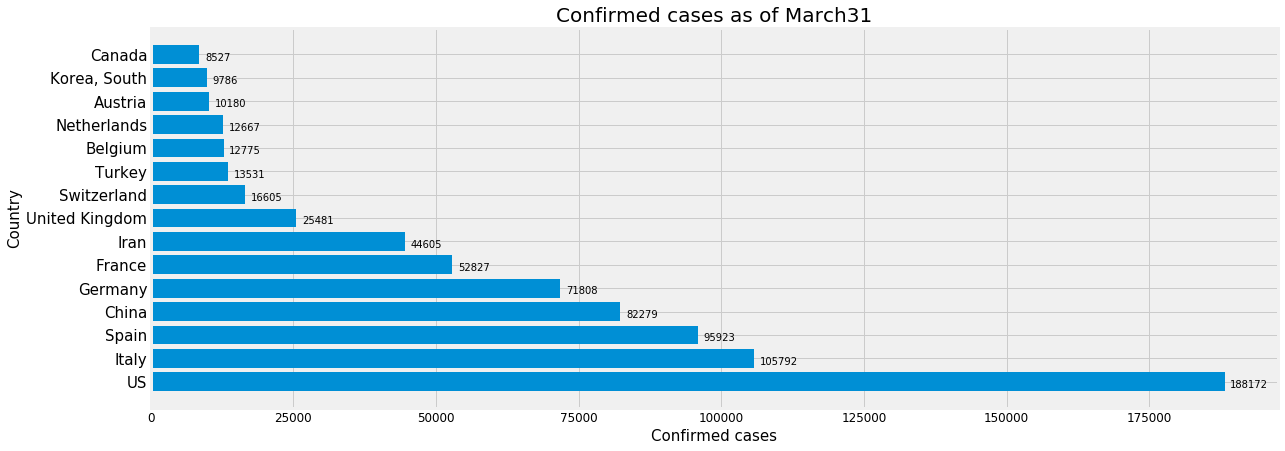

In [20]:
confirmed_top15 = full_df.confirmed.sort_values(ascending=False).head(15)
plt.figure(figsize=(18, 7))
plt.barh(confirmed_top15.index, confirmed_top15)
plt.title('Confirmed cases as of ' + latest_date, size=20)
plt.xlabel('Confirmed cases', size=15)
plt.ylabel('Country', size=15)
plt.xticks(size=12)
plt.yticks(size=15)
plt.grid(True)
for index, value in enumerate(confirmed_top15):
    plt.text(value + 1000, index - .25, str(value))

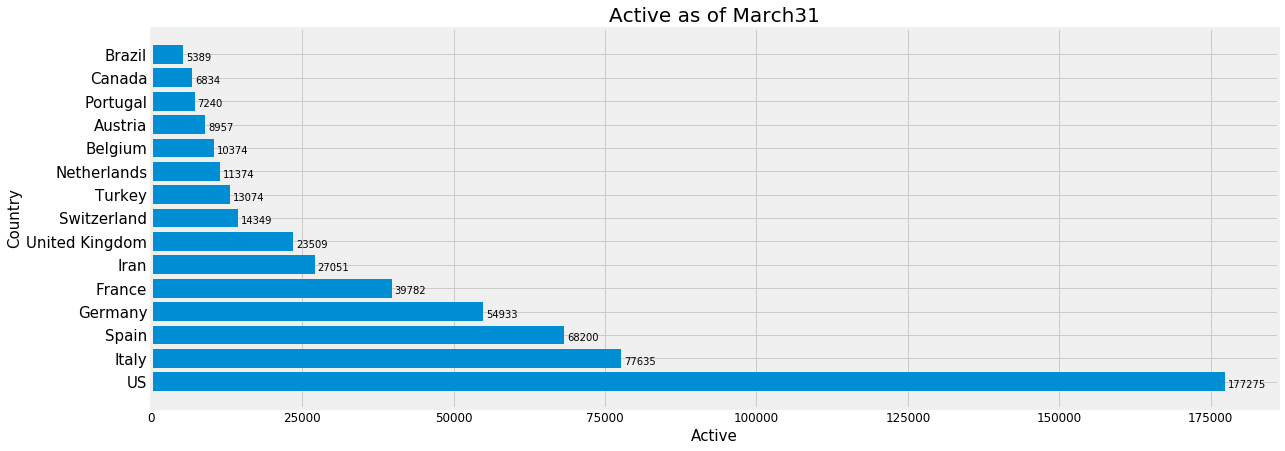

In [30]:
active_top15 = full_df.active.sort_values(ascending=False).head(15)
plt.figure(figsize=(18, 7))
plt.barh(active_top15.index, active_top15)
plt.title('Active as of ' + latest_date, size=20)
plt.xlabel('Active', size=15)
plt.ylabel('Country', size=15)
plt.xticks(size=12)
plt.yticks(size=15)
plt.grid(True)
for index, value in enumerate(active_top15):
    plt.text(value + 500, index - .25, str(value))

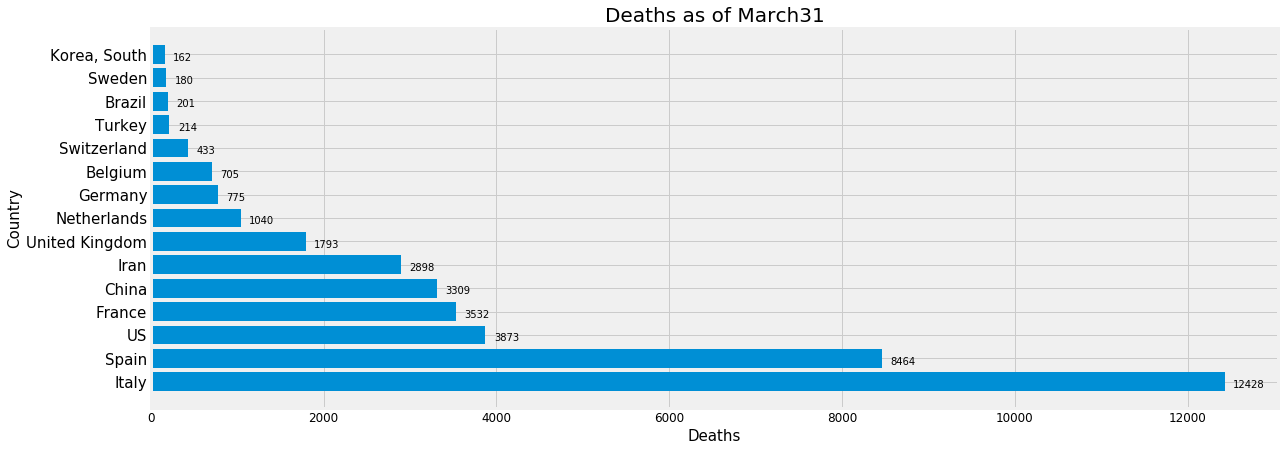

In [27]:
deaths_top15 = full_df.deaths.sort_values(ascending=False).head(15)
plt.figure(figsize=(18, 7))
plt.barh(deaths_top15.index, deaths_top15)
plt.title('Deaths as of ' + latest_date, size=20)
plt.xlabel('Deaths', size=15)
plt.ylabel('Country', size=15)
plt.xticks(size=12)
plt.yticks(size=15)
plt.grid(True)
for index, value in enumerate(deaths_top15):
    plt.text(value + 100, index - .25, str(value))

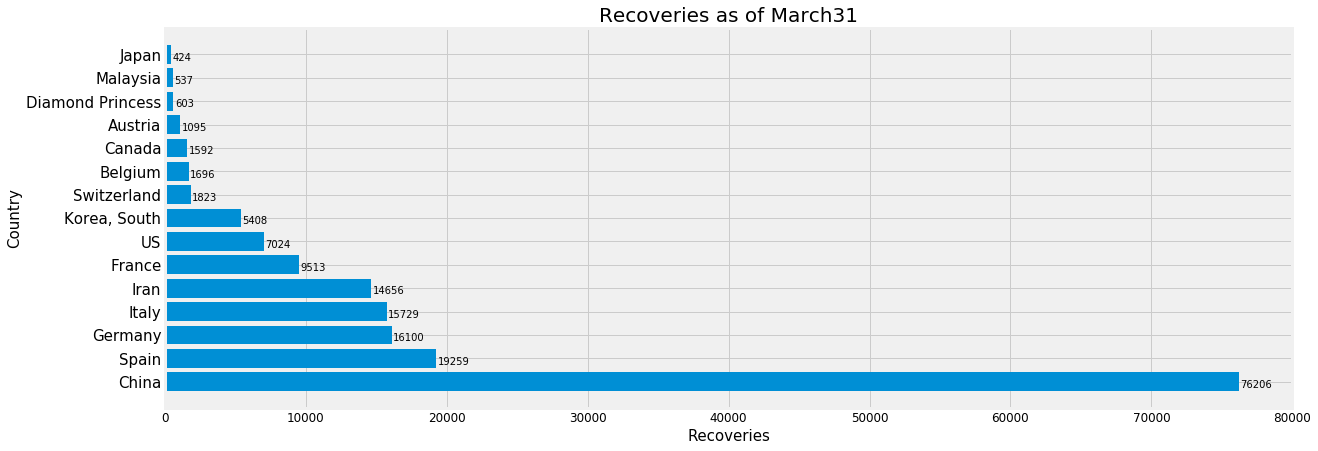

In [31]:
recoveries_top15 = full_df.recoveries.sort_values(ascending=False).head(15)
plt.figure(figsize=(18, 7))
plt.barh(recoveries_top15.index, recoveries_top15)
plt.title('Recoveries as of ' + latest_date, size=20)
plt.xlabel('Recoveries', size=15)
plt.ylabel('Country', size=15)
plt.xticks(size=12)
plt.yticks(size=15)
plt.grid(True)
for index, value in enumerate(recoveries_top15):
    plt.text(value+100, index - .25, str(value))